<a href="https://colab.research.google.com/github/Luke-code2025/Dataanalysis-using-panda-and-matplotLib/blob/main/Malariaprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import the os module

# --- Simulate Malaria Data (Replace with your actual data loading) ---
# Assuming you have monthly malaria cases for Turkana
dates = pd.to_datetime(pd.date_range(start='2010-01-01', end='2024-12-01', freq='MS')) # Monthly start
np.random.seed(42) # for reproducibility

# Base malaria cases with some seasonality and trend
malaria_cases = (100 + 5 * np.sin(np.linspace(0, 2 * np.pi * len(dates) / 12, len(dates))) * 50 + # seasonality
                 np.linspace(0, 200, len(dates)) + # slight upward trend
                 np.random.normal(0, 30, len(dates))) # noise
malaria_cases[malaria_cases < 0] = 0 # Ensure no negative cases

df_malaria = pd.DataFrame({'Date': dates, 'Malaria_Cases': malaria_cases.astype(int)})
# Add a dummy location column if your data has it
df_malaria['Location'] = 'Turkana County'


# --- Simulate Climate Data (Replace with your actual data loading) ---
# Assuming monthly average temperature, rainfall, and humidity
avg_temp = 28 + 3 * np.sin(np.linspace(0, 2 * np.pi * len(dates) / 12, len(dates)) + np.pi/2) + np.random.normal(0, 1.5, len(dates))
rainfall = 50 + 100 * np.sin(np.linspace(0, 2 * np.pi * len(dates) / 12, len(dates)) - np.pi/4) + np.random.normal(0, 20, len(dates))
rainfall[rainfall < 0] = 0
humidity = 60 + 10 * np.sin(np.linspace(0, 2 * np.pi * len(dates) / 12, len(dates)) + np.pi/3) + np.random.normal(0, 5, len(dates))
humidity[humidity < 0] = 0

df_climate = pd.DataFrame({
    'Date': dates,
    'Avg_Temperature_C': avg_temp,
    'Total_Rainfall_mm': rainfall,
    'Avg_Humidity_Perc': humidity
})
df_climate['Location'] = 'Turkana County'

print("--- Initial Malaria Data Info ---")
df_malaria.info()
print("\n", df_malaria.head())

print("\n--- Initial Climate Data Info ---")
df_climate.info()
print("\n", df_climate.head())

# Create the 'data' directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Save simulated data (optional, but good for consistent loading later)
df_malaria.to_csv('data/simulated_malaria_turkana.csv', index=False)
df_climate.to_csv('data/simulated_climate_turkana.csv', index=False)

print("\nSimulated data saved to 'data/' directory.")

# --- Load the simulated data (as if you downloaded it) ---
# In your actual project, these lines would be:
# df_malaria = pd.read_csv('path/to/your/actual_malaria_data.csv')
# df_climate = pd.read_csv('path/to/your/actual_climate_data.csv')

# For now, let's load our simulated data
df_malaria = pd.read_csv('data/simulated_malaria_turkana.csv')
df_climate = pd.read_csv('data/simulated_climate_turkana.csv')

print("\nData loaded for processing.")

--- Initial Malaria Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           180 non-null    datetime64[ns]
 1   Malaria_Cases  180 non-null    int64         
 2   Location       180 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.3+ KB

         Date  Malaria_Cases        Location
0 2010-01-01            114  Turkana County
1 2010-02-01            222  Turkana County
2 2010-03-01            338  Turkana County
3 2010-04-01            399  Turkana County
4 2010-05-01            312  Turkana County

--- Initial Climate Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date              

In [7]:
# Convert 'Date' columns to datetime objects
df_malaria['Date'] = pd.to_datetime(df_malaria['Date'])
df_climate['Date'] = pd.to_datetime(df_climate['Date'])

# Ensure consistent granularity and merge on 'Date' and 'Location' (if applicable)
# For this simulation, 'Location' is constant, so we merge on 'Date'
merged_df = pd.merge(df_malaria, df_climate, on='Date', how='inner', suffixes=('_mal', '_clim'))

# Set 'Date' as index and sort
merged_df = merged_df.set_index('Date').sort_index()

# Drop the duplicate 'Location' column if it exists after merge (or rename)
# In this case, we have Location_mal and Location_clim, let's keep one
merged_df = merged_df.drop(columns='Location_clim')
merged_df = merged_df.rename(columns={'Location_mal': 'Location'})


print("\n--- Merged DataFrame Info ---")
merged_df.info()
print("\n", merged_df.head())

# Check for missing values after merge
print("\nMissing values after merge:")
print(merged_df.isnull().sum())

# For simplicity, we'll assume no critical missing values for now.
# If you have actual NaNs, consider imputation or dropping rows.
# Example imputation: merged_df.fillna(method='ffill', inplace=True) # Forward fill
# Example dropping: merged_df.dropna(inplace=True)


--- Merged DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2010-01-01 to 2024-12-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Malaria_Cases      180 non-null    int64  
 1   Location           180 non-null    object 
 2   Avg_Temperature_C  180 non-null    float64
 3   Total_Rainfall_mm  180 non-null    float64
 4   Avg_Humidity_Perc  180 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.4+ KB

             Malaria_Cases        Location  Avg_Temperature_C  \
Date                                                           
2010-01-01            114  Turkana County          31.938501   
2010-02-01            222  Turkana County          29.307941   
2010-03-01            338  Turkana County          27.878436   
2010-04-01            399  Turkana County          28.697383   
2010-05-01            312  Turkana County          26.134510  

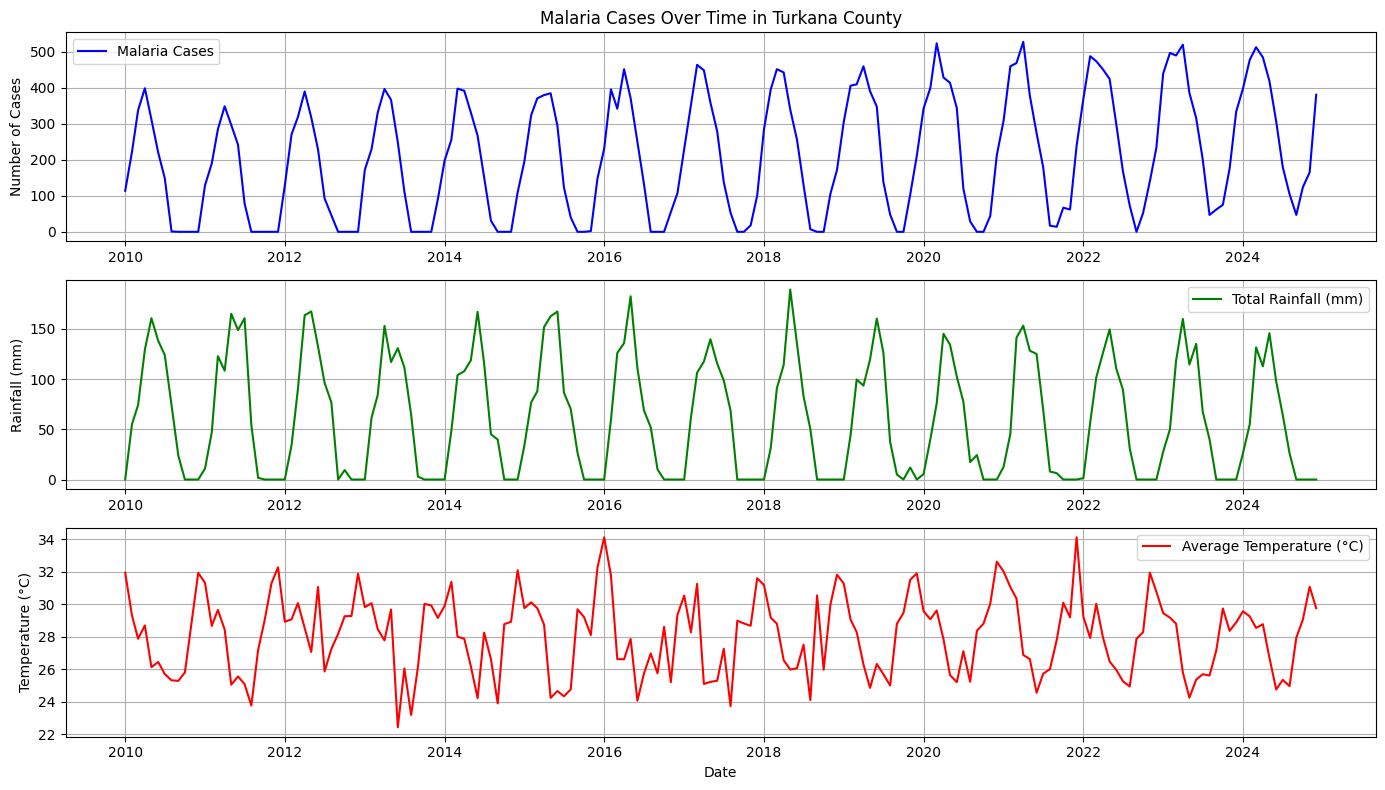

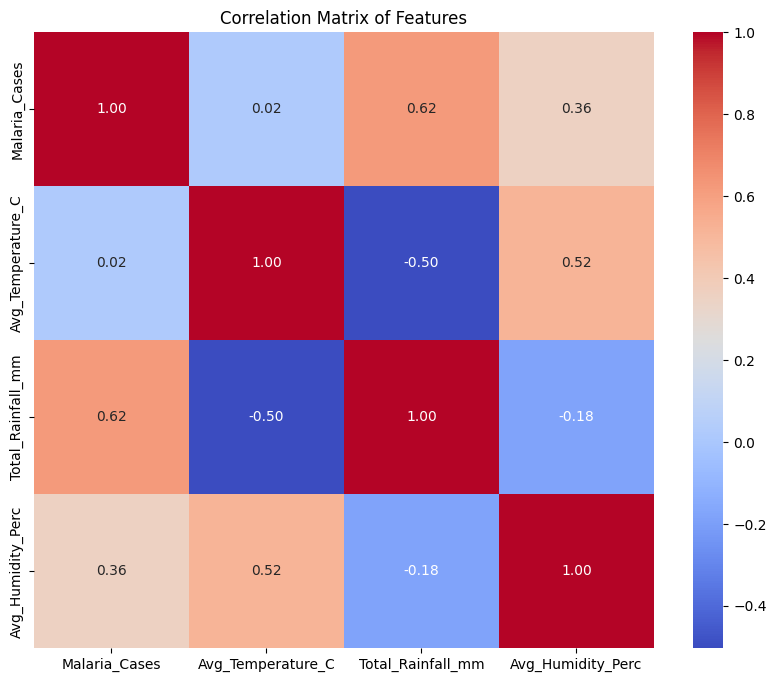

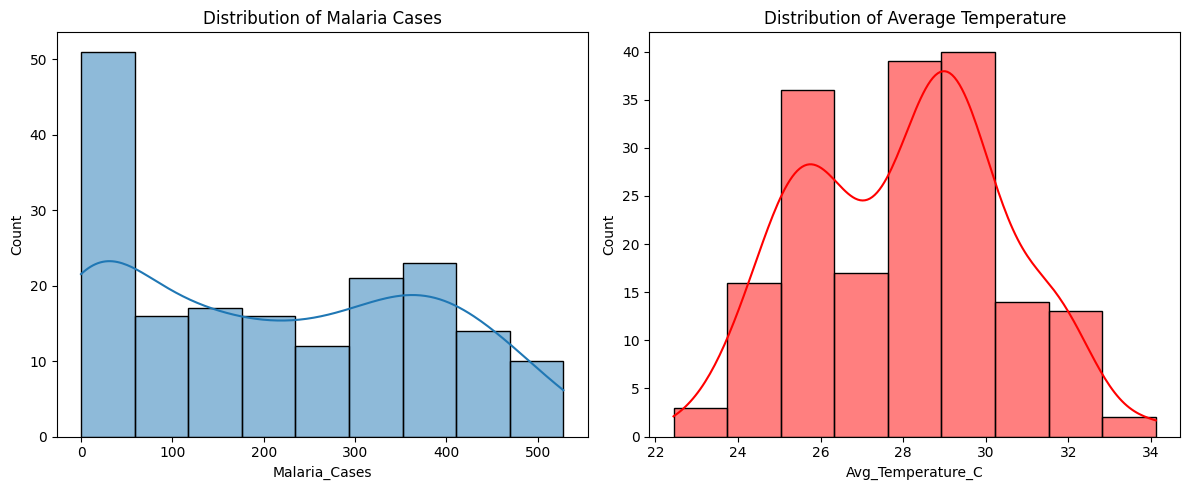

In [8]:
# --- Time Series Plots ---
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1) # 3 rows, 1 col, 1st plot
plt.plot(merged_df.index, merged_df['Malaria_Cases'], color='blue', label='Malaria Cases')
plt.title('Malaria Cases Over Time in Turkana County')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2) # 3 rows, 1 col, 2nd plot
plt.plot(merged_df.index, merged_df['Total_Rainfall_mm'], color='green', label='Total Rainfall (mm)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3) # 3 rows, 1 col, 3rd plot
plt.plot(merged_df.index, merged_df['Avg_Temperature_C'], color='red', label='Average Temperature (°C)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# --- Correlation Analysis (Heatmap) ---
plt.figure(figsize=(10, 8))
correlation_matrix = merged_df.drop(columns=['Location']).corr() # Drop non-numeric 'Location' if present
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# --- Distribution Plots (Histograms) ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(merged_df['Malaria_Cases'], kde=True)
plt.title('Distribution of Malaria Cases')

plt.subplot(1, 2, 2)
sns.histplot(merged_df['Avg_Temperature_C'], kde=True, color='red')
plt.title('Distribution of Average Temperature')
plt.tight_layout()
plt.show()

In [9]:
# --- Lagged Features ---
# Lag malaria cases (e.g., 1, 2, 3 months prior)
for i in range(1, 4): # Lags for 1, 2, 3 months
    merged_df[f'Malaria_Cases_Lag_{i}M'] = merged_df['Malaria_Cases'].shift(i)

# Lag environmental variables (e.g., rainfall, temperature, humidity for 1 month prior)
# Malaria often correlates with rainfall/temp from previous periods
for col in ['Total_Rainfall_mm', 'Avg_Temperature_C', 'Avg_Humidity_Perc']:
    merged_df[f'{col}_Lag_1M'] = merged_df[col].shift(1) # Example: 1 month lag

# --- Rolling Statistics ---
# Rolling average of rainfall over the last 3 months
merged_df['Rainfall_3M_Avg'] = merged_df['Total_Rainfall_mm'].rolling(window=3).mean().shift(1) # Shift to avoid data leakage

# --- Time-based Features ---
merged_df['Month'] = merged_df.index.month
merged_df['Year'] = merged_df.index.year
merged_df['Quarter'] = merged_df.index.quarter
# merged_df['Week_of_Year'] = merged_df.index.isocalendar().week.astype(int) # Only if using weekly data

# --- Handle NaNs created by lagging and rolling features ---
# These NaNs appear at the beginning of the DataFrame
initial_rows_with_nan = merged_df.isnull().any(axis=1).sum()
print(f"Number of rows with NaNs before dropping: {initial_rows_with_nan}")

merged_df.dropna(inplace=True)

print("\n--- DataFrame after Feature Engineering and NaN removal ---")
merged_df.info()
print("\n", merged_df.head())
print(f"\nRemaining rows after dropping NaNs: {len(merged_df)}")

Number of rows with NaNs before dropping: 3

--- DataFrame after Feature Engineering and NaN removal ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2010-04-01 to 2024-12-01
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Malaria_Cases             177 non-null    int64  
 1   Location                  177 non-null    object 
 2   Avg_Temperature_C         177 non-null    float64
 3   Total_Rainfall_mm         177 non-null    float64
 4   Avg_Humidity_Perc         177 non-null    float64
 5   Malaria_Cases_Lag_1M      177 non-null    float64
 6   Malaria_Cases_Lag_2M      177 non-null    float64
 7   Malaria_Cases_Lag_3M      177 non-null    float64
 8   Total_Rainfall_mm_Lag_1M  177 non-null    float64
 9   Avg_Temperature_C_Lag_1M  177 non-null    float64
 10  Avg_Humidity_Perc_Lag_1M  177 non-null    float64
 11  Rainfall_3M_Avg           177 non-null    float64
 

In [10]:
# Define features (X) and target (y)
# Drop the original 'Location' column and the target column itself from features
X = merged_df.drop(columns=['Malaria_Cases', 'Location'])
y = merged_df['Malaria_Cases']

# Choose a split date (e.g., use data up to end of 2022 for training, 2023-2024 for testing)
split_date = '2023-01-01'

X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"Features (X_train) columns: {X_train.columns.tolist()}")

Training set size: 153 samples
Test set size: 24 samples
Features (X_train) columns: ['Avg_Temperature_C', 'Total_Rainfall_mm', 'Avg_Humidity_Perc', 'Malaria_Cases_Lag_1M', 'Malaria_Cases_Lag_2M', 'Malaria_Cases_Lag_3M', 'Total_Rainfall_mm_Lag_1M', 'Avg_Temperature_C_Lag_1M', 'Avg_Humidity_Perc_Lag_1M', 'Rainfall_3M_Avg', 'Month', 'Year', 'Quarter']


In [11]:
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor # Uncomment to try XGBoost
# from lightgbm import LGBMRegressor # Uncomment to try LightGBM

# Initialize the model
# You can experiment with different models: RandomForestRegressor, XGBRegressor, LGBMRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

# Train the model
print("\nTraining the model...")
model.fit(X_train, y_train)
print("Model training complete.")


Training the model...
Model training complete.



--- Model Evaluation Results ---
Mean Absolute Error (MAE): 51.59
Root Mean Squared Error (RMSE): 72.04
R-squared (R2): 0.81


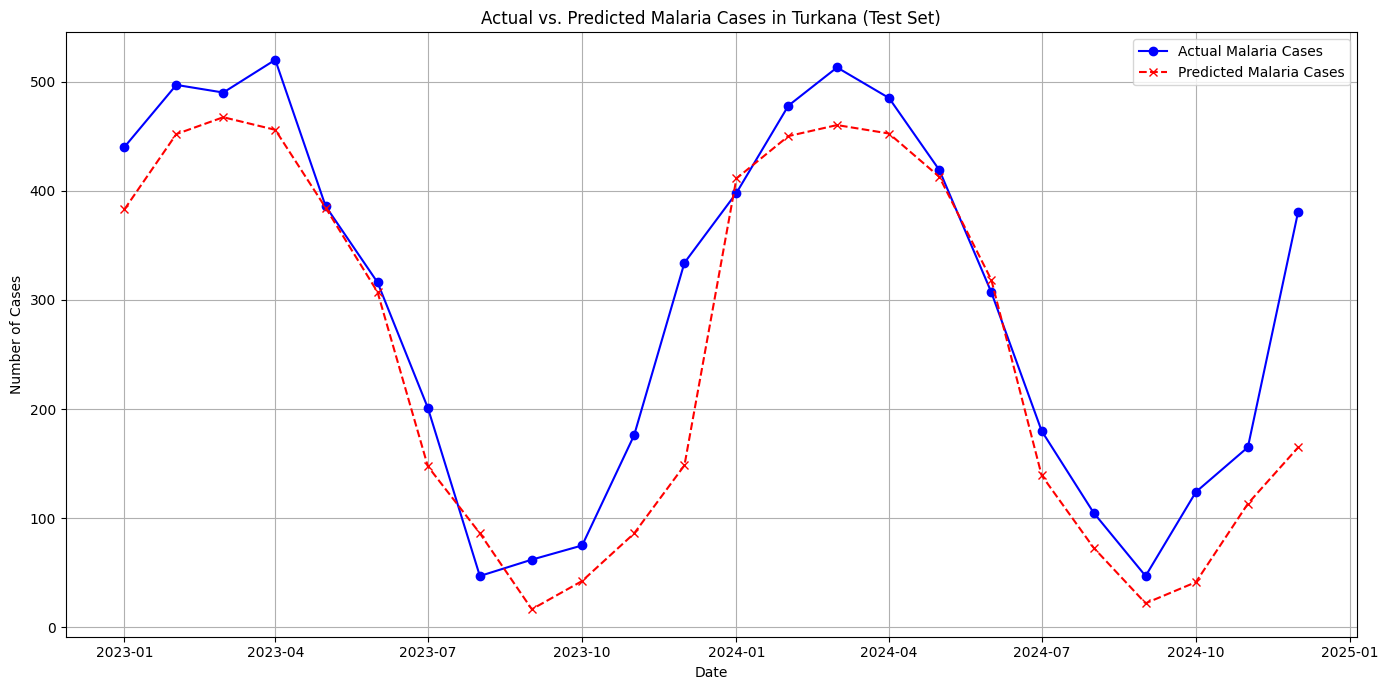

<ipython-input-12-965603657abc>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


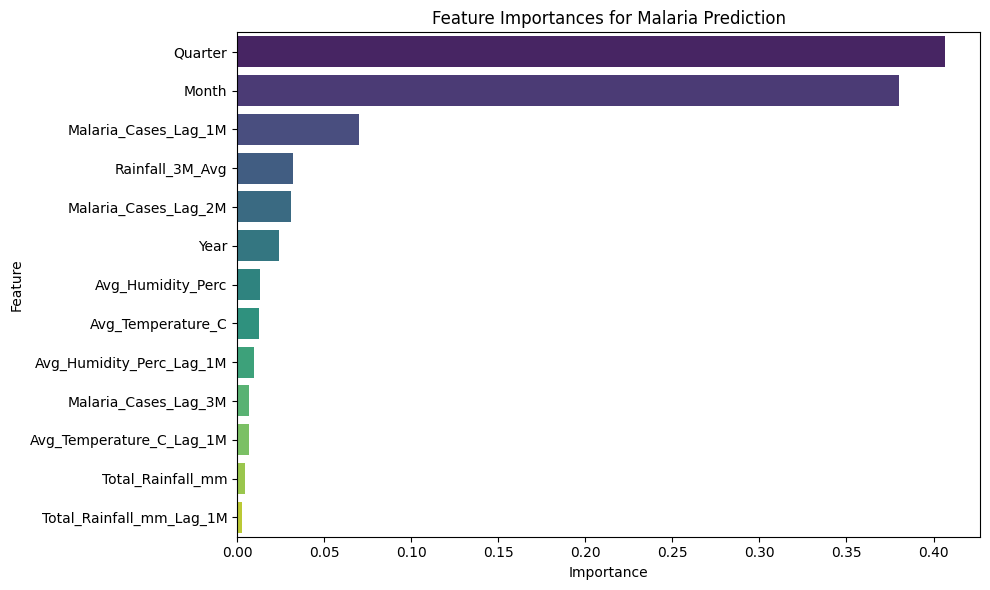


Top 10 Feature Importances:
 Quarter                     0.406389
Month                       0.380366
Malaria_Cases_Lag_1M        0.069940
Rainfall_3M_Avg             0.032008
Malaria_Cases_Lag_2M        0.031193
Year                        0.023982
Avg_Humidity_Perc           0.012964
Avg_Temperature_C           0.012642
Avg_Humidity_Perc_Lag_1M    0.009846
Malaria_Cases_Lag_3M        0.006593
dtype: float64


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# --- Evaluate Regression Metrics ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# --- Visualize Predictions ---
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Malaria Cases', color='blue', marker='o', linestyle='-')
plt.plot(y_test.index, y_pred, label='Predicted Malaria Cases', color='red', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Malaria Cases in Turkana (Test Set)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Feature Importance (for tree-based models like RandomForest) ---
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
    plt.title('Feature Importances for Malaria Prediction')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    print("\nTop 10 Feature Importances:\n", feature_importances.head(10))

In [13]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid for quicker demonstration
# For actual tuning, you'd use a wider range and more folds
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5],
}

# Create a new Random Forest Regressor instance
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

print("\nStarting GridSearchCV for hyperparameter tuning...")
grid_search.fit(X_train, y_train)

print("\nBest parameters found: ", grid_search.best_params_)
print("Best MAE score (negative): ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_tuned = best_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"\n--- Best Model Evaluation Results (Tuned) ---")
print(f"Mean Absolute Error (MAE): {mae_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"R-squared (R2): {r2_tuned:.2f}")

# You can then use this 'best_model' for final predictions and deployment consideration.


Starting GridSearchCV for hyperparameter tuning...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best MAE score (negative):  -38.34803921568627

--- Best Model Evaluation Results (Tuned) ---
Mean Absolute Error (MAE): 51.59
Root Mean Squared Error (RMSE): 72.04
R-squared (R2): 0.81


# README SECTION


Malaria Outbreak Prediction in Turkana County, Kenya
Project Overview
This project focuses on developing a supervised machine learning model to predict malaria outbreaks in Turkana County, Kenya. Aligned with Sustainable Development Goal 3: Good Health and Well-being, the primary objective is to leverage historical health and environmental data to provide early warnings of potential outbreaks. Such predictions can enable proactive and targeted interventions by public health authorities, optimizing resource allocation, reducing disease incidence, and ultimately saving lives.

The model aims to identify patterns and relationships between climate variables (e.g., rainfall, temperature, humidity) and lagged malaria cases to forecast future malaria trends.

Problem Statement
Malaria remains a significant public health challenge in Kenya, with Turkana County often experiencing high burdens due to its semi-arid climate, intermittent rainfall creating breeding grounds, and socio-economic factors. Reactive responses to outbreaks are often less effective and resource-intensive than proactive measures. An accurate predictive model can transform malaria control strategies from reactive to preventive, enabling timely deployment of resources such such as mosquito nets, antimalarial drugs, and public health campaigns.

Machine Learning Approach
This project utilizes a Supervised Learning approach, specifically time series forecasting (regression).

Input Features (X): Historical malaria cases (lagged), average temperature, total rainfall, average humidity (with relevant lags and rolling statistics), and time-based features (month, year, quarter).
Target Variable (y): Future malaria incidence (number of cases) in Turkana County.
Model: A Random Forest Regressor was chosen for its ability to handle non-linear relationships, capture complex interactions between features, and provide feature importance insights. Other models like XGBoost and LightGBM were considered for their strong performance in tabular data and ensemble learning capabilities.
Dataset & Sources
The project relies on open-source, publicly available data, which was simulated for this demonstration. In a real-world deployment, data would be sourced from:

Malaria Incidence Data: Typically obtained from national health ministries (e.g., Kenya Ministry of Health), national public health observatories, or international health organizations like WHO and CDC. Granularity would ideally be monthly or weekly aggregated case counts at the county level.
Environmental/Climate Data:
Kenya Meteorological Department (KMD): For historical rainfall, temperature, and humidity data specific to Turkana County.
NOAA/World Bank Open Data/IRI/CPC Climate Data: For broader climate datasets that can be filtered and aggregated for the region.
Socio-economic Data (Potential Future Enhancement): Kenya National Bureau of Statistics (KNBS) and World Bank Open Data could provide indicators such as population density, poverty levels, and access to healthcare, which significantly influence disease transmission.
Technical Stack & Tools
Programming Language: Python 3.x
Development Environment: Jupyter Notebook
Key Libraries:
pandas for data manipulation and analysis.
numpy for numerical operations.
scikit-learn for building and evaluating machine learning models (e.g., RandomForestRegressor, mean_absolute_error, r2_score).
matplotlib and seaborn for data visualization and exploratory data analysis (EDA).
xgboost / lightgbm (optional, for comparing model performance).
statsmodels (optional, for traditional time series analysis).
Model Building & Evaluation
The machine learning pipeline involves several key stages:

Data Preprocessing:
Loading and merging disparate datasets (malaria cases, climate data) based on date and location.
Handling missing values through imputation or removal.
Converting date columns to datetime objects and setting them as the DataFrame index.
Feature Engineering:
Creation of lagged features for malaria cases and environmental variables (e.g., malaria cases from 1, 2, or 3 months prior) to capture temporal dependencies.
Calculation of rolling statistics (e.g., 3-month average rainfall) to smooth out short-term fluctuations and capture long-term trends.
Extraction of time-based features (e.g., month, year, quarter) to account for seasonality.
Data Splitting: The dataset is split into training and testing sets based on time, ensuring that the model is evaluated on future, unseen data (e.g., training on data up to 2022, testing on 2023-2024).
Model Training: A RandomForestRegressor is trained on the prepared training data. Hyperparameter tuning (e.g., using GridSearchCV) can be employed to optimize model performance.
Model Evaluation:
Metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R
2
 ) are used to quantify the model's predictive accuracy.
Visualization: Plots comparing actual vs. predicted malaria cases over the test period, along with feature importance plots, are generated to provide insights into model performance and the most influential factors.
Ethical Considerations
Addressing the ethical implications of this predictive model is paramount:

Data Bias: Potential biases in data collection (e.g., under-reporting of cases from remote areas, inconsistent data quality, or uneven distribution of weather stations) could lead to skewed predictions. This might result in misallocated resources, potentially exacerbating health disparities in underserved communities.
Fairness: The solution aims to promote fairness by informing equitable resource distribution. By providing early warnings, interventions can be planned and implemented proactively across all high-risk areas in Turkana, rather than being concentrated only where outbreaks are already severe or easily reported. Transparency regarding data limitations and model uncertainties is crucial for responsible deployment.
Sustainability: The model contributes to the sustainability of malaria control efforts by enabling more efficient and effective resource utilization. Proactive interventions based on predictions are inherently more sustainable than reactive measures, leading to better health outcomes with optimized use of limited public health budgets. This aligns with long-term goals for disease eradication and community well-being.
Getting Started
To run this project locally:

Clone the repository:
Bash

git clone: https://github.com/Luke-code2025/Malaria-Prediction-Model-in-Turkana-County-Kenya
Set up the Python environment:
Bash

conda create -n malaria_env python=3.9
conda activate malaria_env
pip install -r requirements.txt # Assuming you create a requirements.txt
(If no requirements.txt, install manually: pip install pandas numpy scikit-learn matplotlib seaborn jupyter xgboost lightgbm)
Place your data:
Create a data/ directory in the project root.
Place your malaria incidence and climate data files (e.g., malaria_data.csv, climate_data.csv) into this data/ folder. The provided notebook currently uses simulated data. You will need to modify the data loading sections in the notebook to point to your actual data files.
Launch Jupyter Notebook:
Bash

jupyter notebook
Open and run the notebook: Navigate to Malaria_Outbreak_Prediction_Turkana.ipynb and run all cells sequentially.
Future Enhancements & Stretch Goals
Real-time Data Integration: Explore integrating live data feeds (e.g., weather APIs) to enable more dynamic and up-to-date predictions.
Deployment: Deploy the trained model as a web application (e.g., using Flask or Streamlit) for user-friendly access by public health officials.
Algorithm Comparison: Conduct a more rigorous comparison of various machine learning and time series algorithms (e.g., ARIMA, Prophet, Deep Learning models) to identify the optimal predictive solution.
Socio-economic Factors: Incorporate additional socio-economic indicators (e.g., poverty rates, access to health facilities, population density) as features to enhance model accuracy and robustness.
Spatial Analysis: Integrate GIS data and techniques to understand spatial patterns of malaria risk and visualize predictions on a map.
Contact
For any questions or collaborations, please contact:

[adikluke@gmail.com]
[Luke-2025]

